In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5g-nidd-dataset/Combined.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import requests, zipfile, io

In [5]:
ls /kaggle/input/

5g-nidd-dataset/


In [6]:
input_path = '/kaggle/input/5g-nidd-dataset'
output_path = '/kaggle/temp/5g-nidd-dataset'
# Copy dataset into working directory
shutil.copytree(input_path, output_path)

'/kaggle/temp/5g-nidd-dataset'

In [7]:
ls /kaggle/temp/

5g-nidd-dataset/


In [8]:
cd /kaggle/temp/5g-nidd-dataset

/kaggle/temp/5g-nidd-dataset


In [9]:
df = pd.read_csv('Combined.csv', low_memory=False)
df.describe()

Unnamed: 0           Seq           Dur       RunTime          Mean  \
count  1.215890e+06  1.215890e+06  1.215890e+06  1.215890e+06  1.215890e+06   
mean   3.158885e+05  4.034334e+04  1.364841e+00  1.364841e+00  1.364841e+00   
std    1.946853e+05  3.777201e+04  1.691295e+00  1.691295e+00  1.691295e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.519860e+05  8.861000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
50%    3.039720e+05  2.722300e+04  0.000000e+00  0.000000e+00  0.000000e+00   
75%    4.559580e+05  6.331600e+04  2.580399e+00  2.580399e+00  2.580399e+00   
max    7.283150e+05  1.372100e+05  1.992063e+01  1.992063e+01  1.992063e+01   

                Sum           Min           Max          sTos           dTos  \
count  1.215890e+06  1.215890e+06  1.215890e+06  1.215676e+06  272823.000000   
mean   1.364841e+00  1.364841e+00  1.364841e+00  8.643825e-01       2.637593   
std    1.691295e+00  1.691295e+00  1.691295e+00  1.251895e+01      21.037454   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
75%    2.580399e+00  2.580399e+00  2.580399e+00  0.000000e+00       0.000000   
max    1.992063e+01  1.992063e+01  1.992063e+01  2.240000e+02     186.000000   

       ...       DstRate        SrcWin        DstWin      sVid    dVid  \
count  ...  1.215890e+06  2.424200e+05  1.770780e+05  114571.0  2009.0   
mean   ...  4.999662e+02  9.149689e+05  6.951336e+04     610.0   610.0   
std    ...  5.657329e+04  4.991476e+06  2.021164e+05       0.0     0.0   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00     610.0   610.0   
25%    ...  0.000000e+00  5.657600e+04  6.476800e+04     610.0   610.0   
50%    ...  0.000000e+00  6.259200e+04  6.489600e+04     610.0   610.0   
75%    ...  0.000000e+00  6.425600e+04  6.502400e+04     610.0   610.0   
max    ...  2.600000e+07  3.355392e+07  1.677696e+07     610.0   610.0   

         SrcTCPBase    DstTCPBase        TcpRtt        SynAck        AckDat  
count  2.786710e+05  2.300470e+05  1.215890e+06  1.215890e+06  1.215890e+06  
mean   2.044248e+09  2.146305e+09  4.669759e-03  5.816065e-04  4.088152e-03  
std    1.233429e+09  1.243342e+09  1.742817e-02  1.305568e-02  1.053588e-02  
min    1.230730e+05  3.308900e+04  0.000000e+00  0.000000e+00  0.000000e+00  
25%    9.862475e+08  1.070929e+09  0.000000e+00  0.000000e+00  0.000000e+00  
50%    1.994167e+09  2.151747e+09  0.000000e+00  0.000000e+00  0.000000e+00  
75%    3.093609e+09  3.224408e+09  0.000000e+00  0.000000e+00  0.000000e+00  
max    4.294967e+09  4.294956e+09  1.051236e+00  1.024680e+00  2.667290e-01  

[8 rows x 44 columns]

In [10]:
df.head()

Unnamed: 0  Seq       Dur   RunTime      Mean       Sum       Min  \
0           0    1  0.000000  0.000000  0.000000  0.000000  0.000000   
1           1    2  0.000000  0.000000  0.000000  0.000000  0.000000   
2           2    3  4.998020  4.998020  4.998020  4.998020  4.998020   
3           3    4  4.998037  4.998037  4.998037  4.998037  4.998037   
4           4    5  4.999453  4.999453  4.999453  4.999453  4.999453   

        Max Proto  sTos  ...  sVid dVid SrcTCPBase  DstTCPBase  TcpRtt  \
0  0.000000  icmp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
1  0.000000  icmp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
2  4.998020   udp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
3  4.998037   udp   0.0  ...   NaN  NaN        NaN         NaN     0.0   
4  4.999453   udp   0.0  ...   NaN  NaN        NaN         NaN     0.0   

   SynAck  AckDat   Label  Attack Type  Attack Tool  
0     0.0     0.0  Benign       Benign       Benign  
1     0.0     0.0  Benign       Benign       Benign  
2     0.0     0.0  Benign       Benign       Benign  
3     0.0     0.0  Benign       Benign       Benign  
4     0.0     0.0  Benign       Benign       Benign  

[5 rows x 52 columns]

In [11]:
df.shape

(1215890, 52)

In [12]:
pd.set_option('float_format', '{:f}'.format)

In [13]:
# Numeric columns
df.select_dtypes('number').head()

Unnamed: 0  Seq      Dur  RunTime     Mean      Sum      Min      Max  \
0           0    1 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
1           1    2 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   
2           2    3 4.998020 4.998020 4.998020 4.998020 4.998020 4.998020   
3           3    4 4.998037 4.998037 4.998037 4.998037 4.998037 4.998037   
4           4    5 4.999453 4.999453 4.999453 4.999453 4.999453 4.999453   

      sTos     dTos  ...  DstRate  SrcWin  DstWin  sVid  dVid  SrcTCPBase  \
0 0.000000      NaN  ... 0.000000     NaN     NaN   NaN   NaN         NaN   
1 0.000000      NaN  ... 0.000000     NaN     NaN   NaN   NaN         NaN   
2 0.000000 0.000000  ... 3.401347     NaN     NaN   NaN   NaN         NaN   
3 0.000000 0.000000  ... 4.001571     NaN     NaN   NaN   NaN         NaN   
4 0.000000 0.000000  ... 3.600394     NaN     NaN   NaN   NaN         NaN   

   DstTCPBase   TcpRtt   SynAck   AckDat  
0         NaN 0.000000 0.000000 0.000000  
1         NaN 0.000000 0.000000 0.000000  
2         NaN 0.000000 0.000000 0.000000  
3         NaN 0.000000 0.000000 0.000000  
4         NaN 0.000000 0.000000 0.000000  

[5 rows x 44 columns]

In [14]:
# Categorical columns
df.select_dtypes('object').head()

Proto sDSb dDSb  Cause State   Label Attack Type Attack Tool
0  icmp  cs0  NaN  Start   ECO  Benign      Benign      Benign
1  icmp  cs0  NaN  Start   ECO  Benign      Benign      Benign
2   udp  cs0  cs0  Start   CON  Benign      Benign      Benign
3   udp  cs0  cs0  Start   CON  Benign      Benign      Benign
4   udp  cs0  cs0  Start   CON  Benign      Benign      Benign

In [15]:
# Are there missing values in columns?
df.isna().any()

Unnamed: 0     False
Seq            False
Dur            False
RunTime        False
Mean           False
Sum            False
Min            False
Max            False
Proto          False
sTos            True
dTos            True
sDSb            True
dDSb            True
sTtl            True
dTtl            True
sHops           True
dHops           True
Cause          False
TotPkts        False
SrcPkts        False
DstPkts        False
TotBytes       False
SrcBytes       False
DstBytes       False
Offset         False
sMeanPktSz     False
dMeanPktSz     False
Load           False
SrcLoad        False
DstLoad        False
Loss           False
SrcLoss        False
DstLoss        False
pLoss          False
SrcGap          True
DstGap          True
Rate           False
SrcRate        False
DstRate        False
State          False
SrcWin          True
DstWin          True
sVid            True
dVid            True
SrcTCPBase      True
DstTCPBase      True
TcpRtt         False
SynAck       

In [16]:
# Missing value count of columns
df.isna().sum()

Unnamed: 0           0
Seq                  0
Dur                  0
RunTime              0
Mean                 0
Sum                  0
Min                  0
Max                  0
Proto                0
sTos               214
dTos            943067
sDSb               214
dDSb            943067
sTtl               214
dTtl            943067
sHops              214
dHops           943067
Cause                0
TotPkts              0
SrcPkts              0
DstPkts              0
TotBytes             0
SrcBytes             0
DstBytes             0
Offset               0
sMeanPktSz           0
dMeanPktSz           0
Load                 0
SrcLoad              0
DstLoad              0
Loss                 0
SrcLoss              0
DstLoss              0
pLoss                0
SrcGap          937219
DstGap          937219
Rate                 0
SrcRate              0
DstRate              0
State                0
SrcWin          973470
DstWin         1038812
sVid           1101319
dVid       

In [17]:
# Get duplicated rows
print(df[df.duplicated()])

def drop_duplicated_rows(df):
    df.drop_duplicates(inplace=True)
    return df

df = drop_duplicated_rows(df)
print(df[df.duplicated()])

        Unnamed: 0  Seq      Dur  RunTime     Mean      Sum      Min      Max  \
728316           0    1 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000   

       Proto     sTos  ...  sVid dVid SrcTCPBase  DstTCPBase   TcpRtt  \
728316  icmp 0.000000  ...   NaN  NaN        NaN         NaN 0.000000   

         SynAck   AckDat   Label  Attack Type  Attack Tool  
728316 0.000000 0.000000  Benign       Benign       Benign  

[1 rows x 52 columns]
Empty DataFrame
Columns: [Unnamed: 0, Seq, Dur, RunTime, Mean, Sum, Min, Max, Proto, sTos, dTos, sDSb, dDSb, sTtl, dTtl, sHops, dHops, Cause, TotPkts, SrcPkts, DstPkts, TotBytes, SrcBytes, DstBytes, Offset, sMeanPktSz, dMeanPktSz, Load, SrcLoad, DstLoad, Loss, SrcLoss, DstLoss, pLoss, SrcGap, DstGap, Rate, SrcRate, DstRate, State, SrcWin, DstWin, sVid, dVid, SrcTCPBase, DstTCPBase, TcpRtt, SynAck, AckDat, Label, Attack Type, Attack Tool]
Index: []

[0 rows x 52 columns]


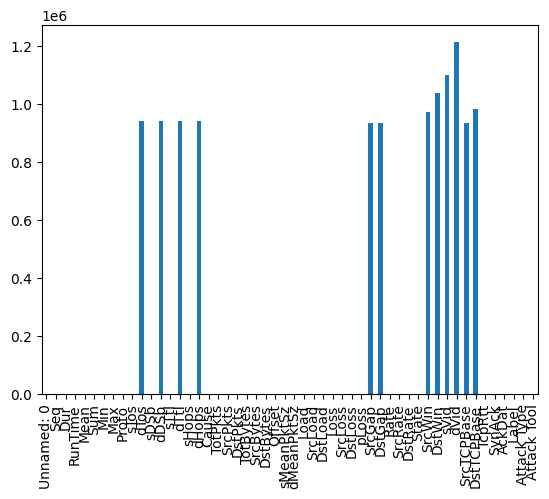

In [18]:
df.isna().sum().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

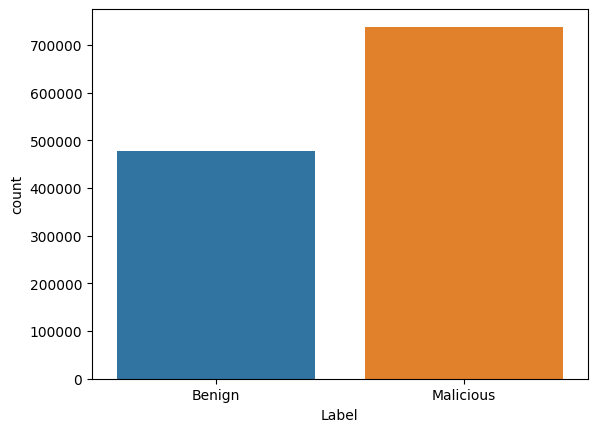

In [19]:
sns.countplot(x='Label', data=df)
plt.show()

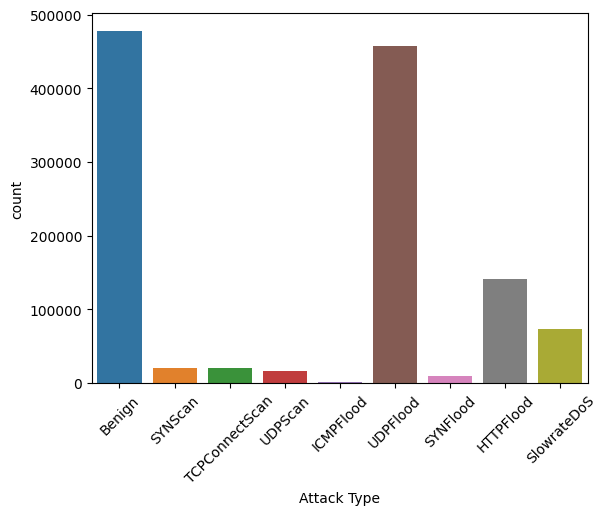

In [26]:
sns.countplot(x='Attack Type', data=df)
plt.xticks(rotation=45)
plt.show()

In [106]:
def view_stats(i, df, col):
    print(f"Column {i} name: {col} \n")
    print(f"Column dtype: {df[col].dtype} \n")
    print(f"Value Description: \n\n{df[col].describe()} \n")
    print(f"Missing value count: {df[col].isna().sum()} \n")
#     print(f"Missing value percentage: {100*df[col].isna().sum()/df[col].size} \n")
    print(f"Unique values Count:  {df[col].nunique()} \n")
    print(f"Unique values: \n\n{df[col].value_counts(sort=True)} \n")
#     print(f"Unique values Percentage: \n\n{df[col].value_counts(sort=True, normalize=True)} \n")
    print('------------------------------------------------------')

In [48]:
# for col in df:
#     view_stats(df, col)

In [46]:
categorical_cols = df.select_dtypes('object').columns
categorical_cols[:-3]

Index(['Proto', 'sDSb', 'dDSb', 'Cause', 'State'], dtype='object')

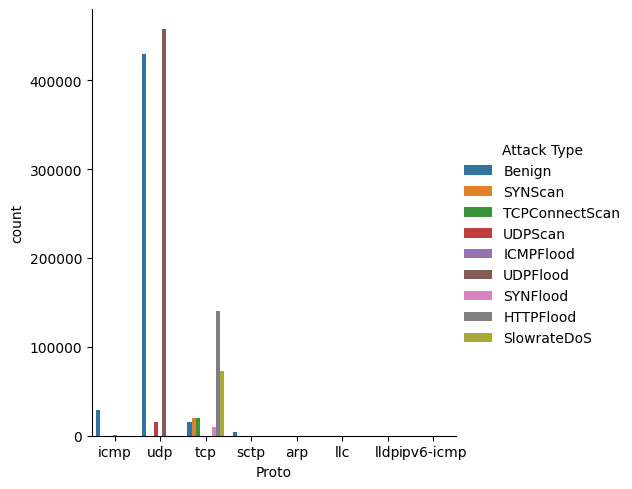

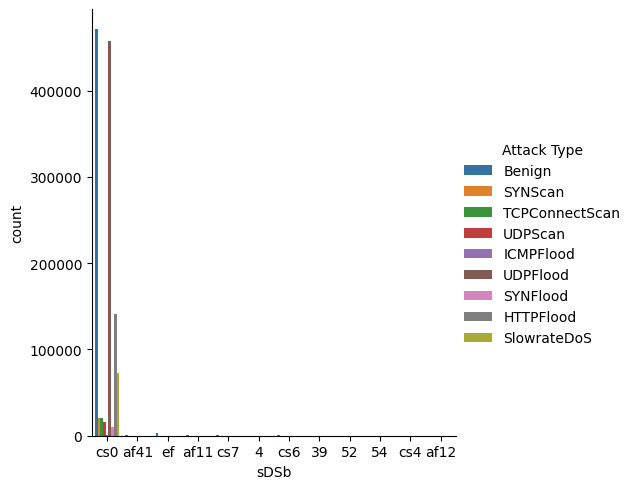

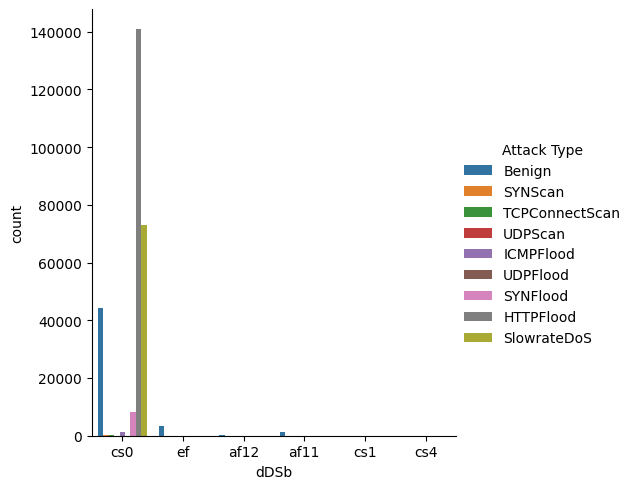

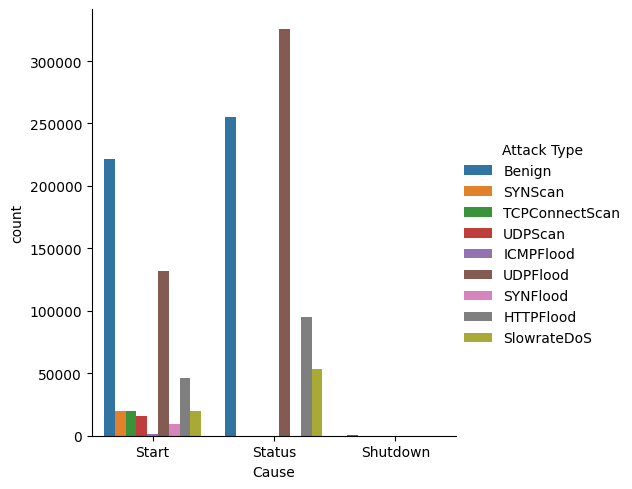

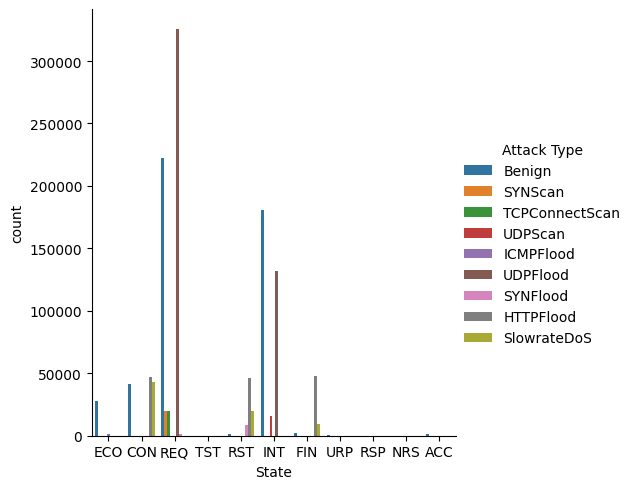

In [50]:
for col in categorical_cols[:-3]:
    sns.catplot(x=col, data=df, kind='count', hue='Attack Type')
    plt.show()

In [97]:
df.columns[df.isna().any()]

Index(['sTos', 'dTos', 'sDSb', 'dDSb', 'sTtl', 'dTtl', 'sHops', 'dHops',
       'SrcGap', 'DstGap', 'SrcWin', 'DstWin', 'sVid', 'dVid', 'SrcTCPBase',
       'DstTCPBase'],
      dtype='object')

In [107]:
def view_missing_cols(i, col):
    
    # for col in df.columns[df.isna().any()]:
    view_stats(i, df, col)
    print('\n------------Attack Type distribution of All rows with col value missing---------------\n')
    
    # Attack Type distribution of All rows with col value missing
    print(df[df[col].apply(lambda x: np.isnan(x))]['Attack Type'].value_counts())

    print('\n-----------Attack Type distribution of All rows with col present----------------\n')

    # Attack Type distribution of All rows with col present
    print(df[df[col].apply(lambda x: ~np.isnan(x))]['Attack Type'].value_counts())

    print('\n----------Plot with non missing col value based on Attack type-----------------\n')
    
    sns.catplot(x=col, data=df[df[col].apply(lambda x: ~np.isnan(x))], kind='count', hue='Attack Type')
    plt.show()
    
    print('\n-----------Plot with Attack Types based on non missing col----------------\n')
    
    sns.catplot(x='Attack Type', data=df[df[col].apply(lambda x: ~np.isnan(x))], kind='count', hue=col)
    plt.xticks(rotation=45)
    plt.show()    
    
    print('\n--------------------------------------------------------------\n')
    print('\n--------------------------------------------------------------\n')

Column 1 name: sTos 

Column dtype: float64 

Value Description: 

count   1215675.000000
mean          0.864383
std          12.518959
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         224.000000
Name: sTos, dtype: float64 

Missing value count: 214 

Unique values Count:  12 

Unique values: 

sTos
0.000000      1209215
186.000000       3538
40.000000         789
192.000000        640
224.000000        528
136.000000        515
208.000000        144
48.000000         137
128.000000         93
16.000000          74
157.000000          1
216.000000          1
Name: count, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type
Benign    214
Name: count, dtype: int64

-----------Attack Type distribution of All rows with col present----------------

Attack Type
Benign            477522
UDPFlood          457340
HTTPFlood  

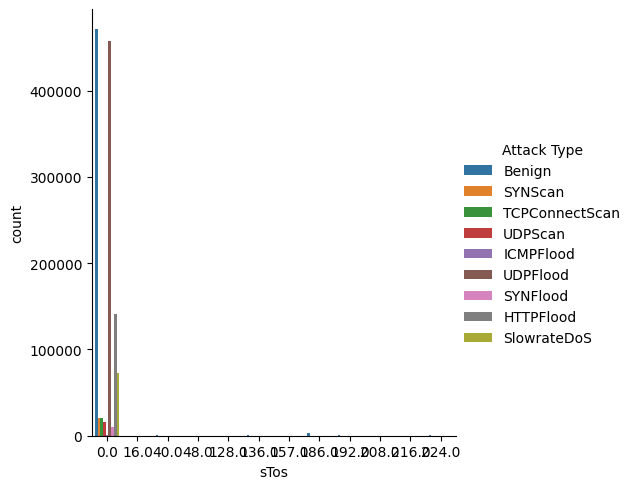


-----------Plot with Attack Types based on non missing col----------------



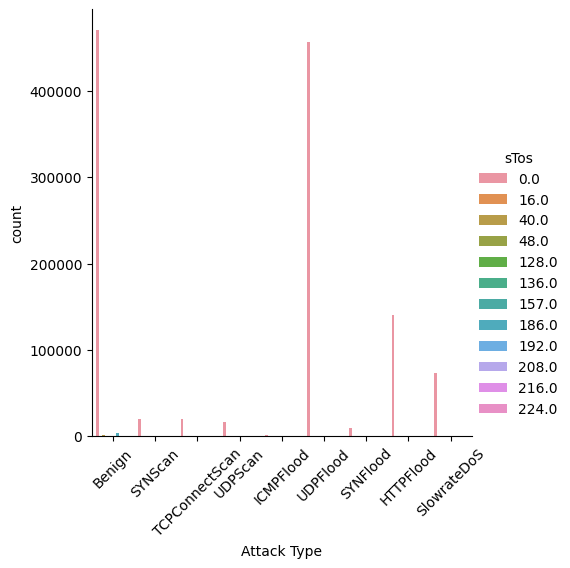


--------------------------------------------------------------


--------------------------------------------------------------

Column 2 name: dTos 

Column dtype: float64 

Value Description: 

count   272823.000000
mean         2.637593
std         21.037454
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        186.000000
Name: dTos, dtype: float64 

Missing value count: 943066 

Unique values Count:  7 

Unique values: 

dTos
0.000000      267523
186.000000      2914
40.000000       1413
184.000000       550
48.000000        390
32.000000         32
128.000000         1
Name: count, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type
UDPFlood          457340
Benign            428342
TCPConnectScan     19961
SYNScan            19960
UDPScan            15867
SYNFlood            1385
SlowrateDoS          205
HTTPFlood     

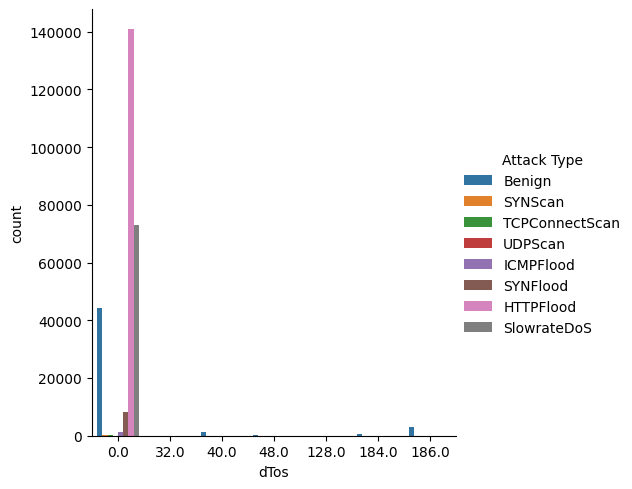


-----------Plot with Attack Types based on non missing col----------------



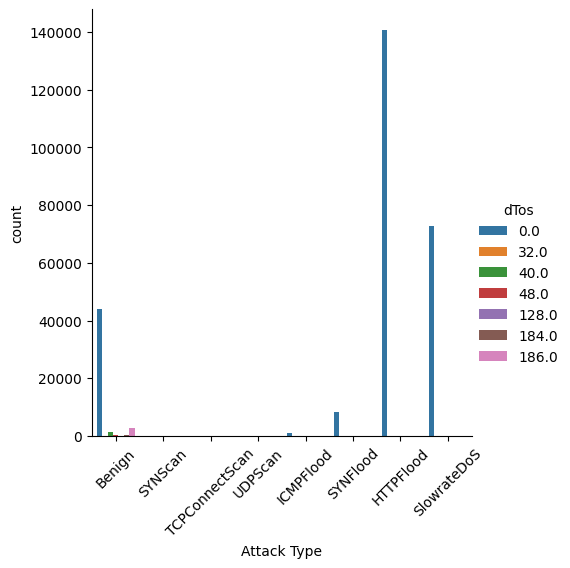


--------------------------------------------------------------


--------------------------------------------------------------

Column 3 name: sTtl 

Column dtype: float64 

Value Description: 

count   1215675.000000
mean         81.454487
std          55.926746
min          36.000000
25%          63.000000
50%          63.000000
75%          63.000000
max         255.000000
Name: sTtl, dtype: float64 

Missing value count: 214 

Unique values Count:  35 

Unique values: 

sTtl
63.000000     981042
249.000000    111726
64.000000      34553
58.000000      29163
117.000000     13722
255.000000      5309
52.000000       2068
53.000000       2065
47.000000       1747
45.000000       1641
37.000000       1622
36.000000       1610
38.000000       1607
51.000000       1605
39.000000       1603
48.000000       1598
56.000000       1596
40.000000       1585
49.000000       1578
55.000000       1562
46.000000       1560
50.000000       1560
42.000000       1547
54.000000       1542
44.000000 

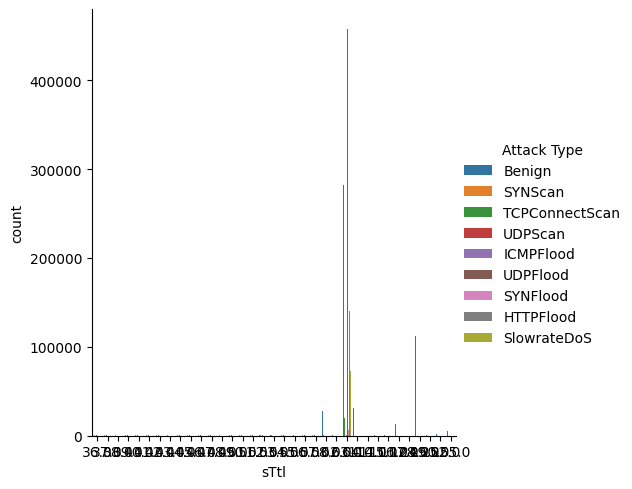


-----------Plot with Attack Types based on non missing col----------------



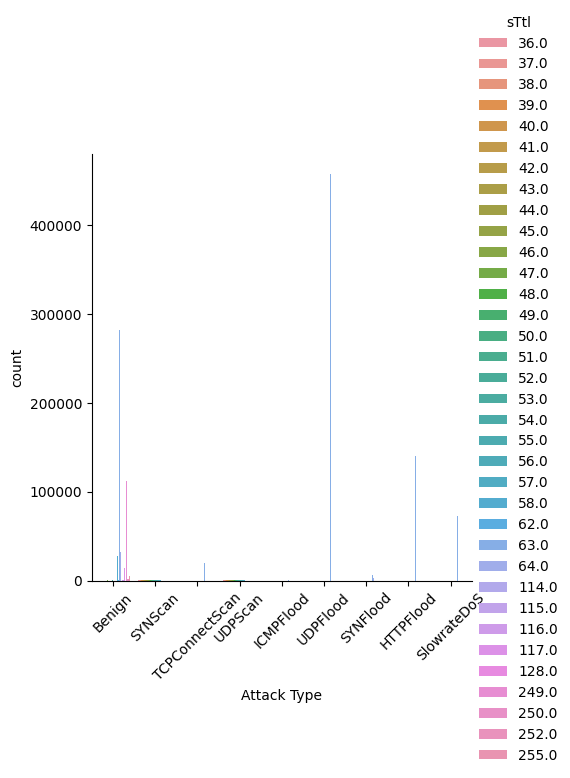


--------------------------------------------------------------


--------------------------------------------------------------

Column 4 name: dTtl 

Column dtype: float64 

Value Description: 

count   272823.000000
mean        65.323638
std         28.091431
min         37.000000
25%         59.000000
50%         59.000000
75%         59.000000
max        255.000000
Name: dTtl, dtype: float64 

Missing value count: 943066 

Unique values Count:  33 

Unique values: 

dTtl
59.000000     223429
64.000000      20061
117.000000     11527
53.000000       4555
52.000000       3363
255.000000      2851
62.000000       2223
63.000000       1547
250.000000      1413
116.000000       772
252.000000       596
115.000000       135
51.000000         91
54.000000         58
47.000000         44
48.000000         29
50.000000         21
43.000000         20
41.000000         17
114.000000        15
42.000000         14
46.000000          7
44.000000          6
37.000000          6
49.000000      

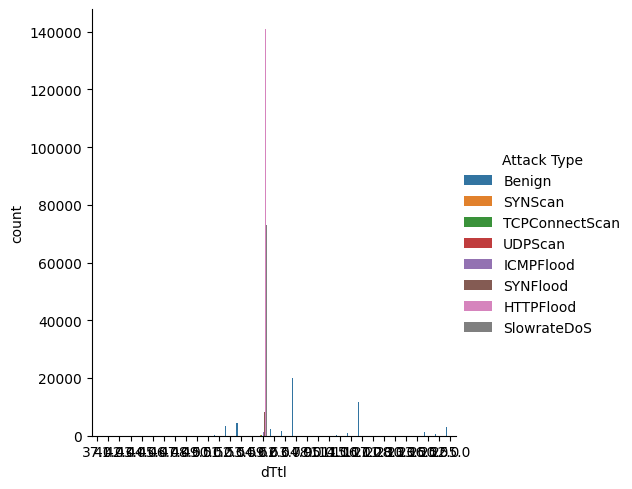


-----------Plot with Attack Types based on non missing col----------------



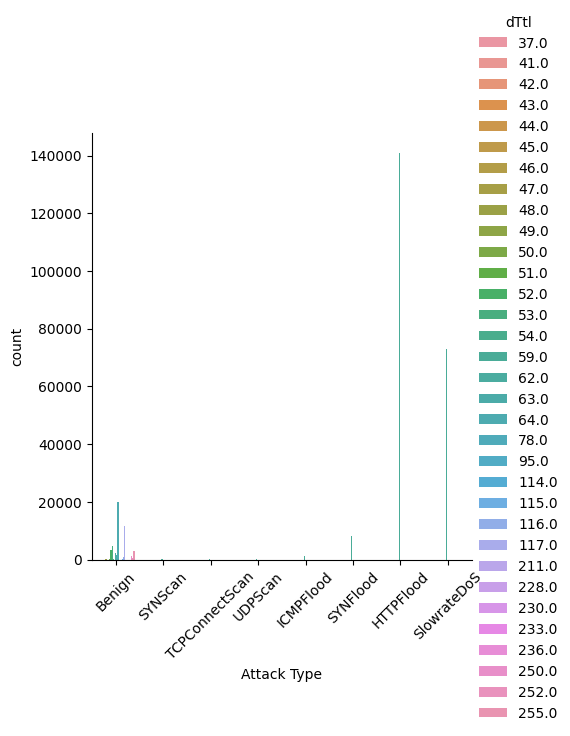


--------------------------------------------------------------


--------------------------------------------------------------

Column 5 name: sHops 

Column dtype: float64 

Value Description: 

count   1215675.000000
mean          2.257097
std           3.564295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          28.000000
Name: sHops, dtype: float64 

Missing value count: 214 

Unique values Count:  27 

Unique values: 

sHops
1.000000     986351
7.000000     113249
0.000000      34579
6.000000      30480
11.000000     15787
12.000000      2676
13.000000      1961
17.000000      1747
19.000000      1641
14.000000      1625
27.000000      1622
28.000000      1610
26.000000      1607
25.000000      1603
16.000000      1598
8.000000       1596
24.000000      1585
15.000000      1578
9.000000       1562
18.000000      1560
22.000000      1547
10.000000      1542
20.000000      1540
21.000000      1536
4.000000       1529
23.000000  

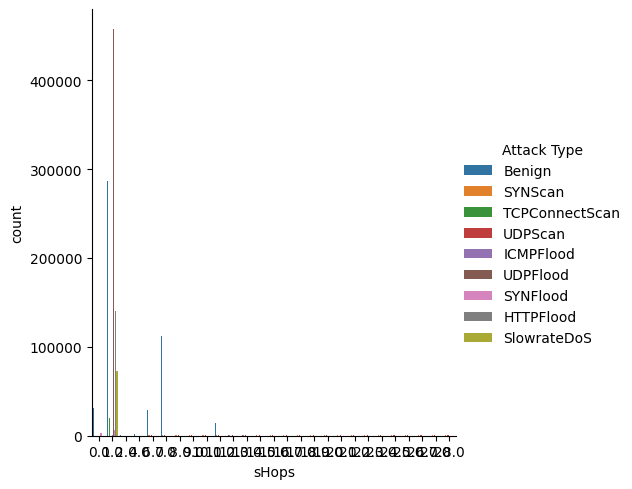


-----------Plot with Attack Types based on non missing col----------------



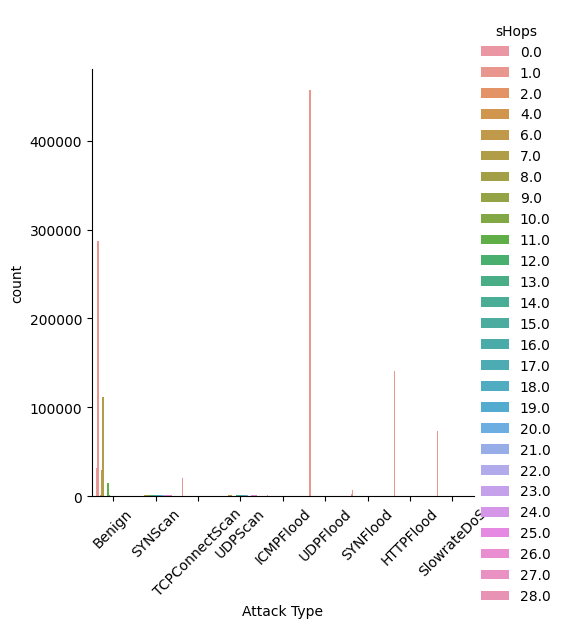


--------------------------------------------------------------


--------------------------------------------------------------

Column 6 name: dHops 

Column dtype: float64 

Value Description: 

count   272823.000000
mean         5.024214
std          2.294874
min          0.000000
25%          5.000000
50%          5.000000
75%          5.000000
max         50.000000
Name: dHops, dtype: float64 

Missing value count: 943066 

Unique values Count:  26 

Unique values: 

dHops
5.000000     223429
0.000000      20061
11.000000     16082
1.000000       4398
12.000000      4135
2.000000       2223
6.000000       1413
4.000000        596
13.000000       226
10.000000        58
17.000000        44
14.000000        36
16.000000        29
21.000000        20
23.000000        18
22.000000        14
20.000000         9
18.000000         7
15.000000         6
27.000000         6
19.000000         4
33.000000         2
45.000000         2
50.000000         2
28.000000         2
26.000000       

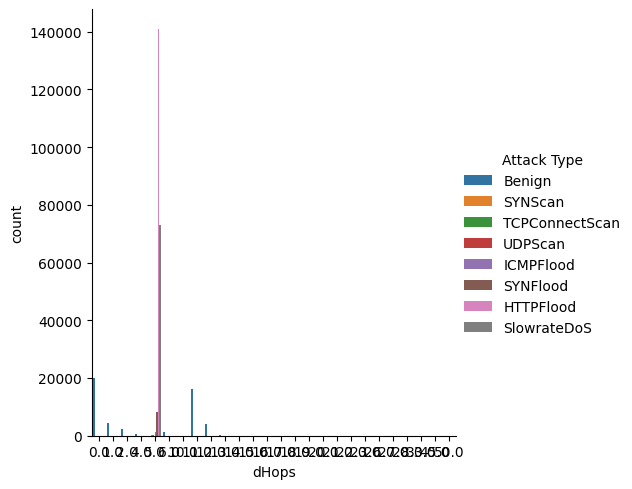


-----------Plot with Attack Types based on non missing col----------------



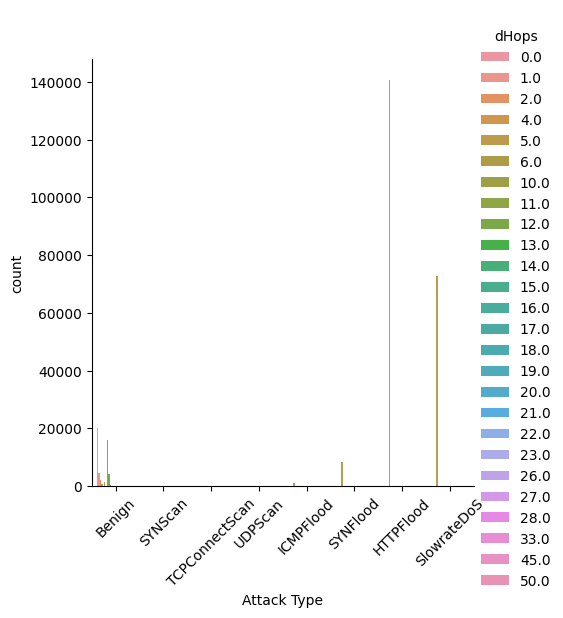


--------------------------------------------------------------


--------------------------------------------------------------

Column 7 name: SrcGap 

Column dtype: float64 

Value Description: 

count   278671.000000
mean         0.052287
std         10.516885
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3064.000000
Name: SrcGap, dtype: float64 

Missing value count: 937218 

Unique values Count:  15 

Unique values: 

SrcGap
0.000000       278650
1.000000            6
3064.000000         2
535.000000          2
560.000000          1
2555.000000         1
145.000000          1
534.000000          1
99.000000           1
798.000000          1
1833.000000         1
96.000000           1
536.000000          1
131.000000          1
80.000000           1
Name: count, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type

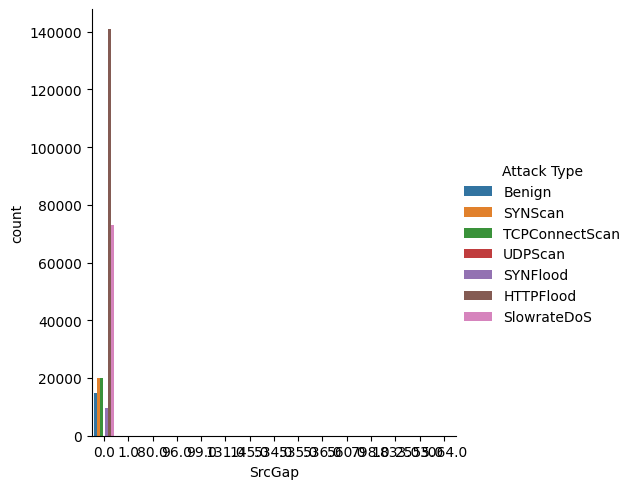


-----------Plot with Attack Types based on non missing col----------------



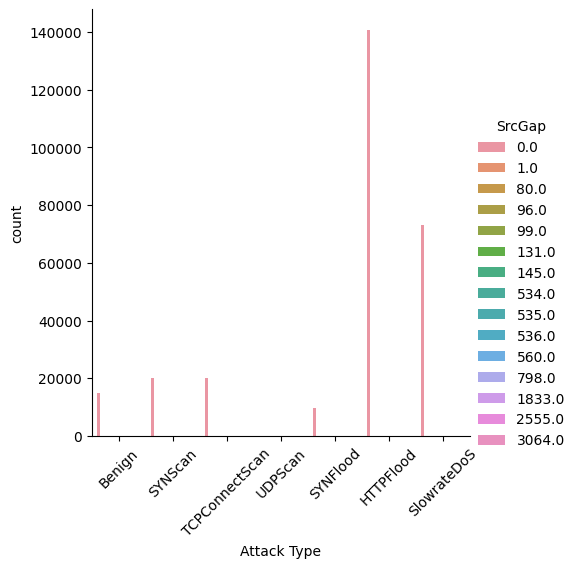


--------------------------------------------------------------


--------------------------------------------------------------

Column 8 name: DstGap 

Column dtype: float64 

Value Description: 

count   278671.000000
mean         1.150898
std        139.820039
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      57387.000000
Name: DstGap, dtype: float64 

Missing value count: 937218 

Unique values Count:  17 

Unique values: 

DstGap
0.000000        278601
2736.000000         20
1368.000000         17
4104.000000         10
5472.000000          7
9576.000000          2
6840.000000          2
2451.000000          2
1083.000000          2
32976.000000         1
8208.000000          1
1447.000000          1
5187.000000          1
6555.000000          1
7923.000000          1
3819.000000          1
57387.000000         1
Name: count, dtype: int64 

------------------------------------------------------

------------Attack Type distribution o

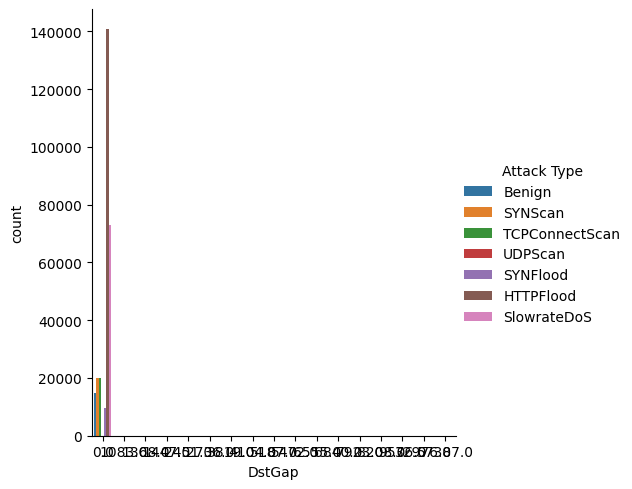


-----------Plot with Attack Types based on non missing col----------------



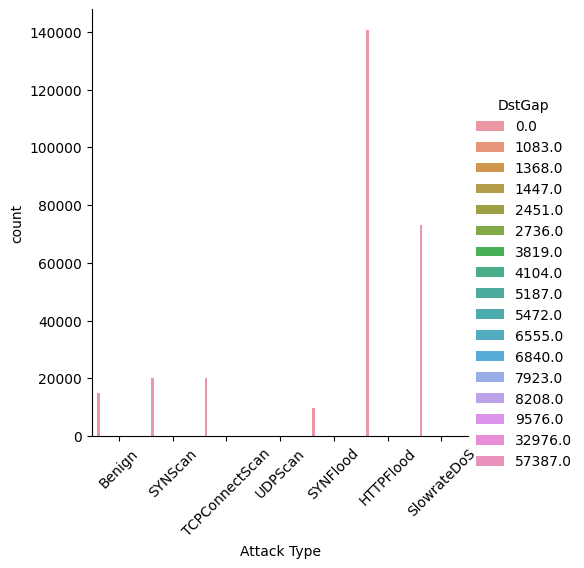


--------------------------------------------------------------


--------------------------------------------------------------

Column 9 name: SrcWin 

Column dtype: float64 

Value Description: 

count     242420.000000
mean      914968.879474
std      4991475.670881
min            0.000000
25%        56576.000000
50%        62592.000000
75%        64256.000000
max     33553920.000000
Name: SrcWin, dtype: float64 

Missing value count: 973469 

Unique values Count:  1087 

Unique values: 

SrcWin
64256.000000      52240
0.000000          35765
56832.000000      35325
64128.000000      24950
62848.000000      24301
                  ...  
1448960.000000        1
672.000000            1
821248.000000         1
1539584.000000        1
132096.000000         1
Name: count, Length: 1087, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type
Benign            462870
UDPFlood

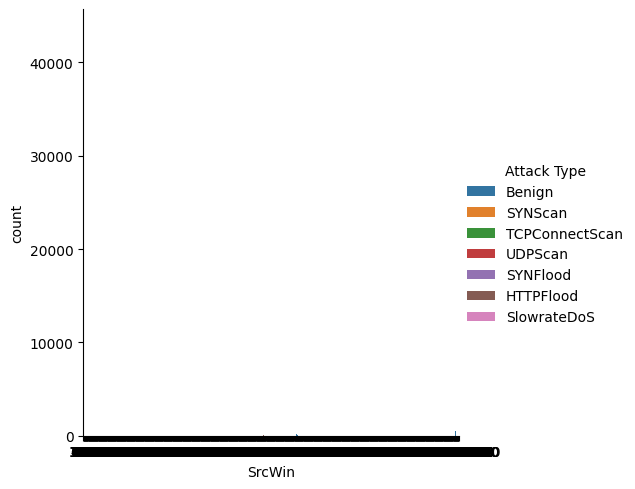


-----------Plot with Attack Types based on non missing col----------------



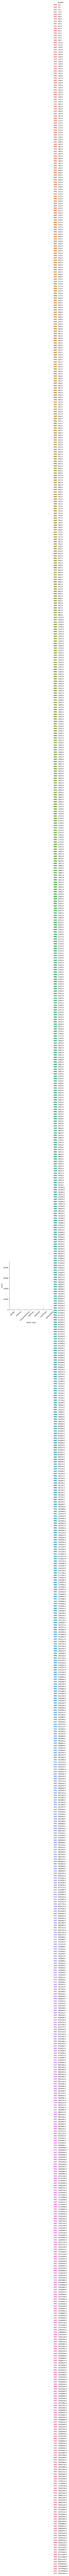


--------------------------------------------------------------


--------------------------------------------------------------

Column 10 name: DstWin 

Column dtype: float64 

Value Description: 

count     177078.000000
mean       69513.358164
std       202116.364533
min            0.000000
25%        64768.000000
50%        64896.000000
75%        65024.000000
max     16776960.000000
Name: DstWin, dtype: float64 

Missing value count: 1038811 

Unique values Count:  1085 

Unique values: 

DstWin
64896.000000     63001
65024.000000     46602
64768.000000     38264
64640.000000     11251
64240.000000      8358
                 ...  
387328.000000        1
203776.000000        1
393216.000000        1
384512.000000        1
264.000000           1
Name: count, Length: 1085, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type
Benign            469940
UDPFlood         

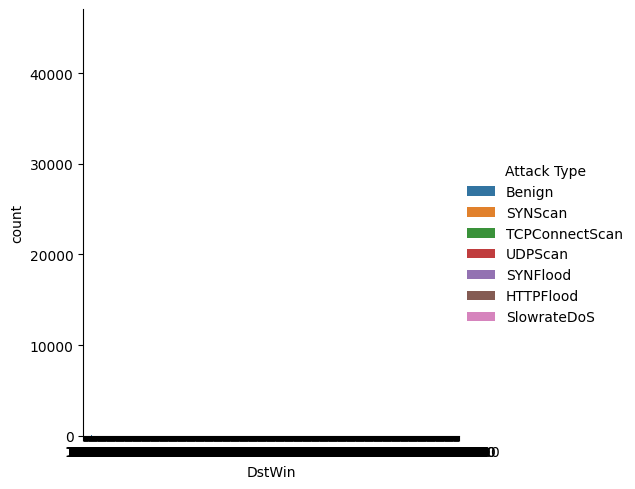


-----------Plot with Attack Types based on non missing col----------------



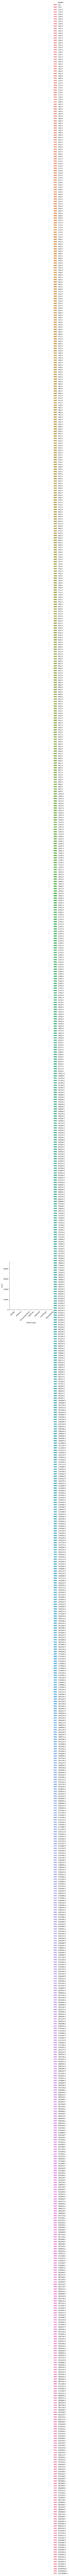


--------------------------------------------------------------


--------------------------------------------------------------

Column 11 name: sVid 

Column dtype: float64 

Value Description: 

count   114571.000000
mean       610.000000
std          0.000000
min        610.000000
25%        610.000000
50%        610.000000
75%        610.000000
max        610.000000
Name: sVid, dtype: float64 

Missing value count: 1101318 

Unique values Count:  1 

Unique values: 

sVid
610.000000    114571
Name: count, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type
UDPFlood          457340
Benign            363165
HTTPFlood         140812
SlowrateDoS        73124
TCPConnectScan     20052
SYNScan            20043
UDPScan            15906
SYNFlood            9721
ICMPFlood           1155
Name: count, dtype: int64

-----------Attack Type distribution of All rows with col pres

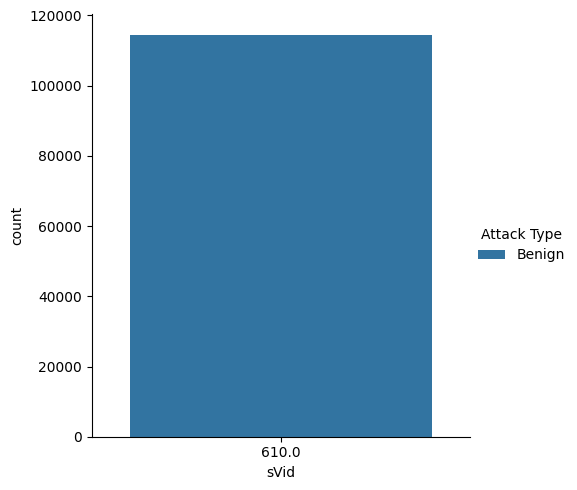


-----------Plot with Attack Types based on non missing col----------------



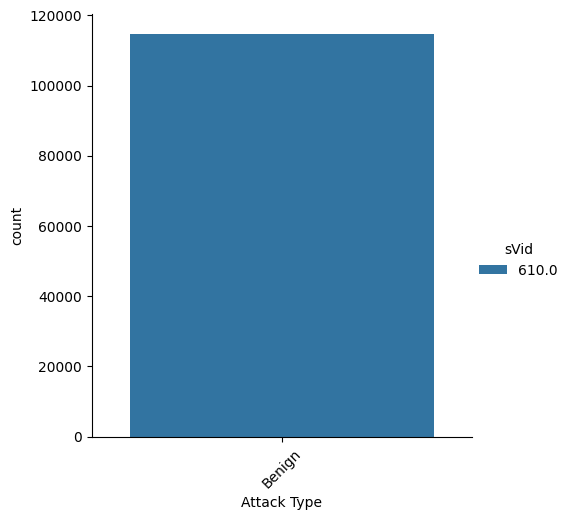


--------------------------------------------------------------


--------------------------------------------------------------

Column 12 name: dVid 

Column dtype: float64 

Value Description: 

count   2009.000000
mean     610.000000
std        0.000000
min      610.000000
25%      610.000000
50%      610.000000
75%      610.000000
max      610.000000
Name: dVid, dtype: float64 

Missing value count: 1213880 

Unique values Count:  1 

Unique values: 

dVid
610.000000    2009
Name: count, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing---------------

Attack Type
Benign            475727
UDPFlood          457340
HTTPFlood         140812
SlowrateDoS        73124
TCPConnectScan     20052
SYNScan            20043
UDPScan            15906
SYNFlood            9721
ICMPFlood           1155
Name: count, dtype: int64

-----------Attack Type distribution of All rows with col present---------------

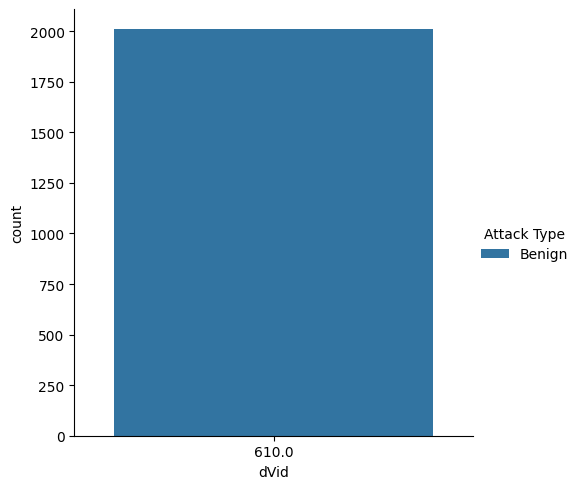


-----------Plot with Attack Types based on non missing col----------------



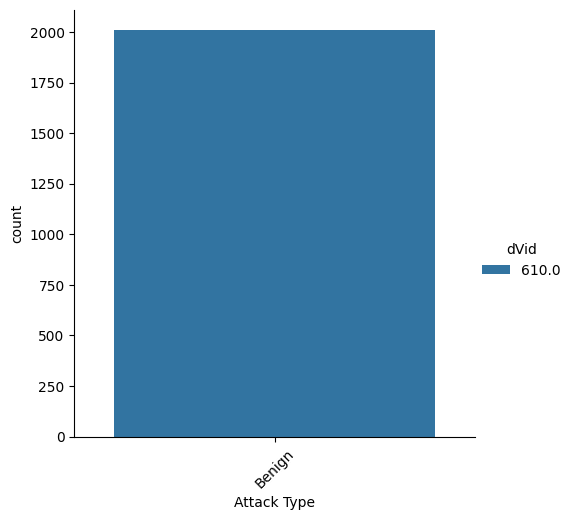


--------------------------------------------------------------


--------------------------------------------------------------

Column 13 name: SrcTCPBase 

Column dtype: float64 

Value Description: 

count       278671.000000
mean    2044247683.019428
std     1233429312.640444
min         123073.000000
25%      986247487.000000
50%     1994167345.000000
75%     3093609023.500000
max     4294967295.000000
Name: SrcTCPBase, dtype: float64 

Missing value count: 937218 

Unique values Count:  203756 

Unique values: 

SrcTCPBase
469337034.000000     1000
2715121370.000000    1000
867637886.000000     1000
1668789075.000000    1000
17369830.000000      1000
                     ... 
2282491040.000000       1
4057868734.000000       1
615259073.000000        1
2813210291.000000       1
2237372583.000000       1
Name: count, Length: 203756, dtype: int64 

------------------------------------------------------

------------Attack Type distribution of All rows with col value missing-------

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x791868f9a680> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x791868f99990> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [108]:
numeric_cols_df = df.select_dtypes('number')

for i, col in enumerate(numeric_cols_df.columns[numeric_cols_df.isna().any()]):
    view_missing_cols(i+1, col)

In [ ]:
# Conclusion -> sTos can be set to 0.0 or missing values can be dropped, since all missing values belong to Benign type, benign has multiple sTos, and sTos value of 0 has almost all types

# sTos, sDSb, sTtl, sHops all have 214 missing values -> We can treat them similarly

In [114]:
df.groupby(['sDSb', 'Attack Type'])['Attack Type'].count().sort_values()

sDSb  Attack Type   
39    Benign                 1
54    Benign                 1
4     Benign                74
cs4   Benign                93
af12  Benign               137
52    Benign               144
af41  Benign               515
cs7   Benign               528
cs6   Benign               640
af11  Benign               789
cs0   ICMPFlood           1155
ef    Benign              3538
cs0   SYNFlood            9721
      UDPScan            15906
      SYNScan            20043
      TCPConnectScan     20052
      SlowrateDoS        73124
      HTTPFlood         140812
      UDPFlood          457340
      Benign            471062
Name: Attack Type, dtype: int64